In [2]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk import FreqDist
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer
import altair as alt
from vega_datasets import data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bake9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bake9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ZoeLeBlanc/visualizing_humanities_data_workshop/master/web_scraped_humanist_listserv.csv")

In [5]:
df.head()

,dates,text
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...


In [7]:
df = df.iloc[:21]
df['end'] = df["dates"].str.split("-").str[1]
df['start'] = df["dates"].str.split("-").str[0]
df.head()

C:\Users\bake9\AppData\Local\Temp\ipykernel_30016\505374930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end'] = df["dates"].str.split("-").str[1]
C:\Users\bake9\AppData\Local\Temp\ipykernel_30016\505374930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df["dates"].str.split("-").str[0]


,dates,text,end,start
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,1988,1987
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,1989,1988
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,1990,1989
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...,1991,1990
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...,1992,1991


In [8]:
df['volume_len']=df['text'].str.count('\n')
df.head()

C:\Users\bake9\AppData\Local\Temp\ipykernel_30016\3941460014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volume_len']=df['text'].str.count('\n')


,dates,text,end,start,volume_len
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,1988,1987,50794
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,1989,1988,36109
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,1990,1989,108695
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...,1991,1990,118929
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...,1992,1991,81193


In [9]:
def cut_words(row):
    cut_words = ""
    for token in row.text.split(" "):
        cut_words += porter.stem(token) + " "
    return cut_words
df['chopped'] = df.apply(cut_words, axis = 1)

C:\Users\bake9\AppData\Local\Temp\ipykernel_30016\1589837548.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chopped'] = df.apply(cut_words, axis = 1)


In [32]:
listed = df.text.tolist()
vectorizer = TfidfVectorizer(max_df=.5, min_df=1, stop_words=stop_words)
fixed_list = vectorizer.fit_transform(listed)
fixed_list_as_array = fixed_list.toarray()
dates = df.dates.tolist()
tfidf_results = []
for counter, doc in enumerate(fixed_list_as_array):
    # add everything into a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'vectorized_value']).sort_values(by='vectorized_value', ascending=False).reset_index(drop=True)
    one_doc_as_df['dates'] = dates[counter]
    tfidf_results.append(one_doc_as_df)

c:\Users\bake9\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\bake9\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\bake9\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\bake9\AppData\Local\Programs\Python\Python3

In [33]:
tfidf_df = pd.concat(tfidf_results)
tfidf_df.head(15)


,term,vectorized_value,dates
0,utorepas,0.766377,1987-1988
1,vax,0.203525,1987-1988
2,ibycus,0.088428,1987-1988
3,cmi011,0.084506,1987-1988
4,goerwitz,0.075795,1987-1988
5,hare,0.075359,1987-1988
6,bjorndahl,0.074338,1987-1988
7,zacour,0.072432,1987-1988
8,ihnp4,0.066980,1987-1988
9,goer,0.065037,1987-1988


In [35]:
unique_words = tfidf_df.term.unique()[:5]
print(unique_words)

['utorepas' 'vax' 'ibycus' 'cmi011' 'goerwitz']


In [36]:
unique_five = tfidf_df.drop_duplicates(subset ="term",keep = 'first').head()
unique_five

,term,vectorized_value,dates
0,utorepas,0.766377,1987-1988
1,vax,0.203525,1987-1988
2,ibycus,0.088428,1987-1988
3,cmi011,0.084506,1987-1988
4,goerwitz,0.075795,1987-1988


In [37]:
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

<AxesSubplot:>

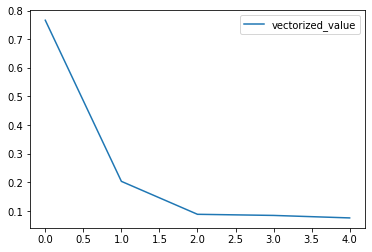

In [41]:
five = unique_five[['term', 'vectorized_value']]
five.plot()